In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("D:\Python\ClassRoom\Mini Project Linear Regression (Group Activity)\insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
data.shape

(1338, 7)

### Looking at these above exploration we understanding:
   - Dataset has 1338 rows and 7 columns.
   - There are features which are categorical in nature but in int and float type.
   - Later analyse and finalize whether to convert them to categorical or treat as integers.

### Check for Missing Values:

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
#checking for missing values in the colums
round(100*(data.isnull().sum()/len(data)),2).sort_values(ascending = False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64

In [10]:
#checking for missing values in the rows
round(100*(data.isnull().sum(axis=1)/len(data)),2).sort_values(ascending = False)

0       0.0
898     0.0
896     0.0
895     0.0
894     0.0
       ... 
445     0.0
444     0.0
443     0.0
442     0.0
1337    0.0
Length: 1338, dtype: float64

- There are no missing / Null values either in columns or rows

### Checking for Redundancy In The Data

In [12]:
data1 = data.copy()

In [13]:
#Checking for duplicates and dropping the entire duplicate row if any
data1.drop_duplicates(subset=None, inplace=True)

In [14]:
data1.shape

(1337, 7)

In [15]:
data.shape

(1338, 7)

- The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there were zero duplicate values in the dataset.

## Data Cleaning
- Checking value_counts() for entire dataframe.

In [16]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [17]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [18]:
data["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

- There seems to be no unknown values in the entire dataset.

### Coverting the categorical data into category type for futher analysis or one hot encoding

In [44]:
#Check the datatypes before conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Convert to 'category' data type
data["sex"] = data["sex"].astype("category")
data["smoker"] = data["smoker"].astype("category")
data["children"] = data["children"].astype("category")
data["region"] = data["region"].astype("category")

In [45]:
data1 = pd.get_dummies(data, drop_first=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   expenses          1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


As we can see:
- created dummy variable
- Drop original variable for which the dummy was created
- Drop first dummy variable for each set of dummies created.


In [21]:
data1.shape

(1338, 9)

# SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
- We will use train_test_split method from sklearn package for this

In [23]:
from sklearn.model_selection import train_test_split

#'random_state' so that the train and test data set always have the same rows, respectively
train_data, test_data = train_test_split(data1, test_size = 0.20)

- Verify the info and shape of the dataframes after split:

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 746 to 829
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1070 non-null   int64  
 1   bmi               1070 non-null   float64
 2   children          1070 non-null   int64  
 3   expenses          1070 non-null   float64
 4   sex_male          1070 non-null   uint8  
 5   smoker_yes        1070 non-null   uint8  
 6   region_northwest  1070 non-null   uint8  
 7   region_southeast  1070 non-null   uint8  
 8   region_southwest  1070 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 47.0 KB


In [25]:
train_data.shape

(1070, 9)

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 984 to 1040
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               268 non-null    int64  
 1   bmi               268 non-null    float64
 2   children          268 non-null    int64  
 3   expenses          268 non-null    float64
 4   sex_male          268 non-null    uint8  
 5   smoker_yes        268 non-null    uint8  
 6   region_northwest  268 non-null    uint8  
 7   region_southeast  268 non-null    uint8  
 8   region_southwest  268 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 11.8 KB


In [27]:
test_data.shape

(268, 9)

### Visualising Numeric Variables
- Let's make a pairplot of all the numeric variables.

In [28]:
train_data.columns

Index(['age', 'bmi', 'children', 'expenses', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

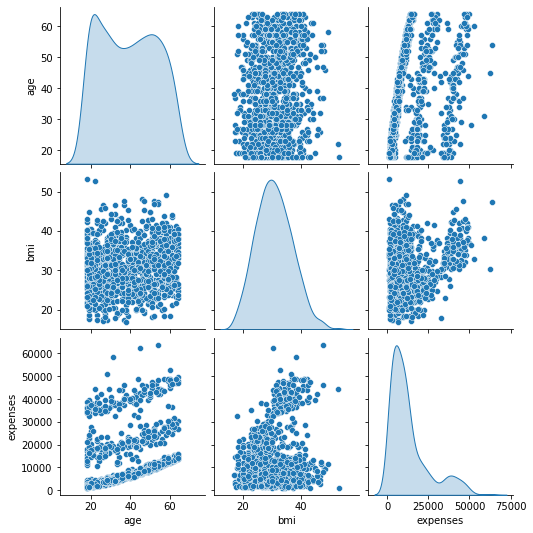

In [29]:
# Create a new dataframe of only numeric variables:

numeric_data = train_data[[ "age", "bmi", "expenses"]]

sns.pairplot(numeric_data, diag_kind='kde')
plt.show()

- The above PairPlot tells us that there is a ***LINEAR RELATION*** between  **"age" and "charges"** and **"bmi" and "charges"**

## Visualising Catagorical Variables

- Box plot (refer the fig above) to study their effect on the dependent variable ("charges")

<AxesSubplot:xlabel='sex', ylabel='expenses'>

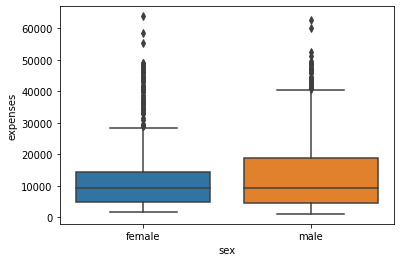

In [30]:
sns.boxplot(x = "sex", y = "expenses", data = data)

- **sex**: data is bit baised towards male , data is represented as 50.5 : 49.5 for male: female . Interquartile range for male is higher compared  to interquartile range for female.

<AxesSubplot:xlabel='children', ylabel='expenses'>

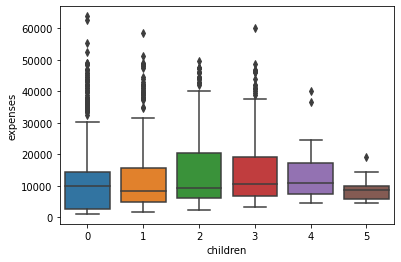

In [31]:
sns.boxplot(x = "children", y = "expenses", data = data)

- **Children** : People have 2 children are having highest data  distribution  between 50 percentile to 75 percentile among all others.

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

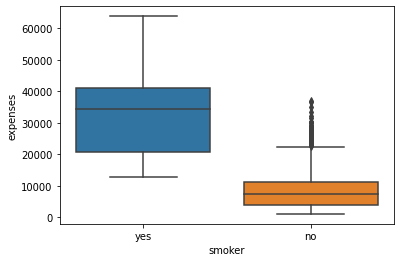

In [32]:
sns.boxplot(x = "smoker", y = "expenses", data = data)

- **smoker**: 20.5 % of our data are smoker. Median for Smokers are quite high compared to people who don't smoke.

<AxesSubplot:xlabel='region', ylabel='expenses'>

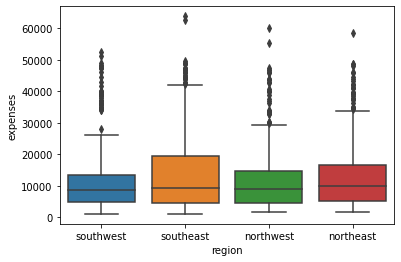

In [33]:
sns.boxplot(x = "region", y = "expenses", data = data)

- **region** : Region as Souteast are having highest data  distribution  between 50 percentile to 75 percentile among all others.

## Correlation Matrix

- Let's check the correlation coefficients to see which variables are highly correlated. Here we are considering only those variables (dataframe: data1) that were chosen for analysis

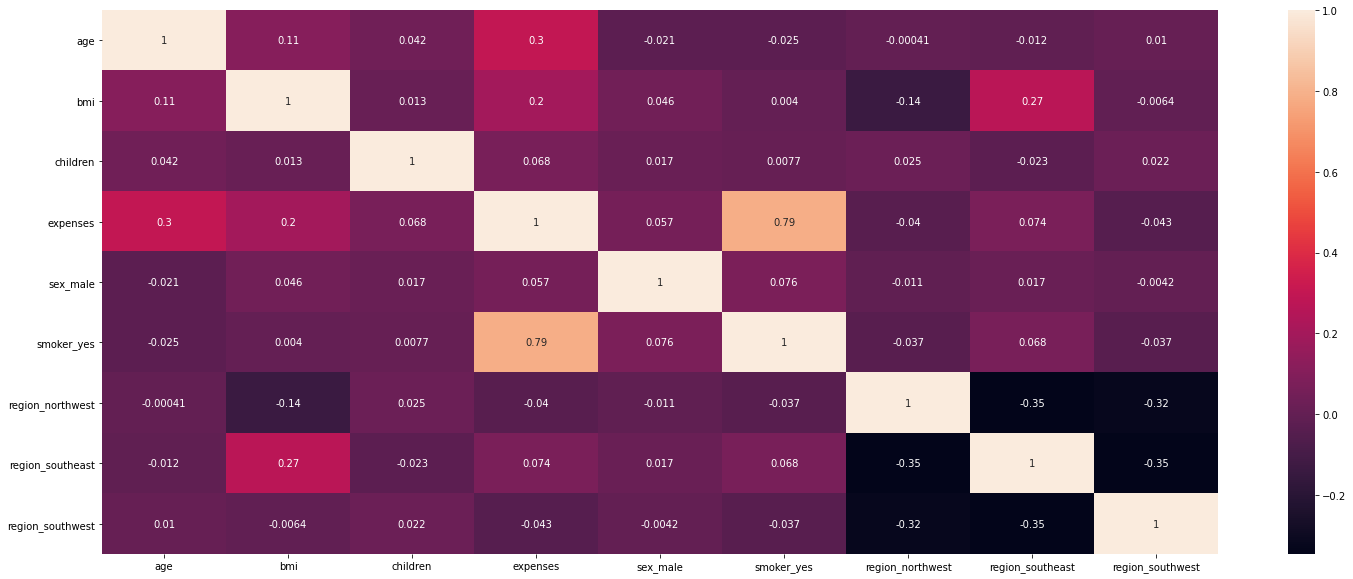

In [34]:
plt.figure(figsize = (25,10))
sns.heatmap(data1.corr(), annot = True)
plt.show()

- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF and for identifying the correct variable to select/eliminate from the model.

## Amol's Part

In [51]:
print(train_data.head())
print(test_data.head())

     age   bmi  children  expenses  sex_male  smoker_yes  region_northwest  \
746   34  27.0         2  11737.85         1           0                 0   
315   52  33.3         0   9722.77         1           0                 0   
139   22  36.0         0   2166.73         0           0                 0   
873   43  30.1         1   6849.03         1           0                 0   
232   19  17.8         0   1727.79         0           0                 0   

     region_southeast  region_southwest  
746                 0                 1  
315                 0                 0  
139                 0                 1  
873                 0                 1  
232                 0                 1  
     age   bmi  children  expenses  sex_male  smoker_yes  region_northwest  \
984   20  30.1         5   4915.06         1           0                 0   
748   47  36.0         1   8556.91         0           0                 0   
781   18  41.1         0   1146.80         1 

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [165]:
X_train = train_data.drop('expenses',axis = 1)
X_test = test_data.drop('expenses',axis = 1)
Y_train = train_data.expenses
Y_test = test_data.expenses


In [166]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1070, 8) (1070,) (268, 8) (268,)


In [167]:
model = LinearRegression()

In [168]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print("R^2 Value: ",model.score(X_test,Y_test))
print("Intercept: ",model.intercept_)
print("Coeffient: ",model.coef_)
p = pd.DataFrame({"Actaul": Y_test,'Predicted':Y_pred})
print(p)


R^2 Value:  0.7241137671556126
Intercept:  -12260.904138957021
Coeffient:  [  250.52111002   347.05036403   517.07201607   -30.35271833
 23743.52164981  -303.49809244  -805.80850135  -697.68918281]
        Actaul     Predicted
984    4915.06   5750.741381
748    8556.91  11826.783970
781    1146.80   5676.084583
140   27375.90   5034.533070
920   13451.12  11249.974600
...        ...           ...
1307  21472.48  30985.845514
841   12323.94  11061.632626
1090  41676.08  34984.171640
1327   9377.90  10608.094189
1040  20234.85  29664.768462

[268 rows x 2 columns]


In [169]:
def my_model(X_train,Y_train,X_test,Y_test):
    lm = LinearRegression()
    lm.fit(X_train,Y_train)
    ypred = lm.predict(X_test)
    
    return (lm.score(X_test,Y_test)),ypred


In [170]:
def scalling(scaler):
    X_train_scale= scaler.fit_transform(X_train)
    X_test_scale = scaler.fit_transform(X_test)
    return X_train_scale,X_test_scale


In [171]:
X_train_scale_Value ,X_test_scale_Value= scalling(MinMaxScaler())

Rsquare,Y_pred = my_model(X_train_scale_Value ,Y_train,X_test_scale_Value,Y_test)
print("R^2 Value: ",Rsquare)

print("\nUsing MinMaxScaler-----------------------------------------------------------")
p = pd.DataFrame({"Actaul": Y_test,'Predicted':Y_pred})
print(p)


R^2 Value:  0.7256982332449515

Using MinMaxScaler-----------------------------------------------------------
        Actaul     Predicted
984    4915.06   6298.657232
748    8556.91  12487.793850
781    1146.80   6434.853708
140   27375.90   5434.851629
920   13451.12  11700.131206
...        ...           ...
1307  21472.48  31495.424406
841   12323.94  11506.038688
1090  41676.08  35649.015215
1327   9377.90  11154.093192
1040  20234.85  30172.430506

[268 rows x 2 columns]


In [172]:
X_train_scale_Value ,X_test_scale_Value= scalling(StandardScaler())

Rsquare,Y_pred = my_model(X_train_scale_Value ,Y_train,X_test_scale_Value,Y_test)
print("R^2 Value: ",Rsquare)

print("\nUsing StanardScaler-----------------------------------------------------------")
p = pd.DataFrame({"Actaul": Y_test,'Predicted':Y_pred})
print(p)


R^2 Value:  0.7159714344172612

Using StanardScaler-----------------------------------------------------------
        Actaul     Predicted
984    4915.06   4884.467485
748    8556.91  11412.271246
781    1146.80   5088.363800
140   27375.90   4210.075386
920   13451.12  10780.015557
...        ...           ...
1307  21472.48  29826.044492
841   12323.94  10584.162383
1090  41676.08  34182.431212
1327   9377.90  10111.819860
1040  20234.85  28610.992969

[268 rows x 2 columns]


In [173]:
from sklearn.preprocessing import PolynomialFeatures


In [174]:
# X_train = train_data.drop('expenses',axis = 1)
# X_test = test_data.drop('expenses',axis = 1)
# Y_train = train_data.expenses
# Y_test = test_data.expenses


In [175]:
# Polynomial_Features = PolynomialFeatures(degree = 5)
Polynomial_Features = PolynomialFeatures(degree = 7)


In [176]:
X_train_poly = Polynomial_Features.fit_transform(X_train)
X_test_poly = Polynomial_Features.fit_transform(X_test)


In [177]:
linear_model = LinearRegression()
linear_model.fit(X_train_poly,Y_train)
ypred = linear_model.predict(X_test_poly)
rsquare = linear_model.score(X_train_poly,Y_train)

In [160]:
print("R^2 Value: ",rsquare)
print("\nUsing Polynomial Regression -----------------------------------------------------------")
d = pd.DataFrame({'Actual':Y_test,'Predicted':ypred})

print(d)

R^2 Value:  0.9568696964093771

Using Polynomial Regression -----------------------------------------------------------
        Actual     Predicted
984    4915.06  8.187184e+07
748    8556.91  8.722415e+03
781    1146.80  3.906493e+03
140   27375.90 -2.286633e+04
920   13451.12 -2.851478e+03
...        ...           ...
1307  21472.48 -9.326681e+06
841   12323.94  1.206392e+04
1090  41676.08 -3.084388e+05
1327   9377.90  9.154748e+02
1040  20234.85 -6.528726e+04

[268 rows x 2 columns]
